# Evaluating Aircraft Safety: A Risk Assessment Blueprint for Expanding in the Aviation Industry

<img src="image.jpg" alt="Aircraft Image" style="width: 80%;"/>


## Business Understanding

### 1.0 Business problem
..The National Transportation Safety Board provided aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### 2.0 Objectives
* To find the safest planes to buy
* To visualise the accidents happening between 1983 - 2023
* To understand the companies owning the largest market share

### 3.0 Brief Conclusion 
The evaluation will provide business intelligence by recommending how the business should move forward with the new aviation opportunity...

## Data Understanding

### 2.1 Importing the libraries

In [275]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### 2.2 Reading the Dataset
The dataset used in this evaluation was sourced from The National Transportation Safety Board. 

The 'AviationData.csv' dataset is about civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. 

The dataset had over 88,000 rows and 31 columns.

### 2.3 Loading the Data

In [276]:
aviation_data_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

In [277]:
# Show the first 5 rows of the DataFrame
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [278]:
# Shape
aviation_data_df.shape

(88889, 31)

##### Comment
> This confirms there are 88K rows and cols

In [279]:
# Show a summary of the DataFrame
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [280]:
len(aviation_data_df.select_dtypes("O").columns)

26

In [281]:
len(aviation_data_df.select_dtypes(exclude="O").columns)

5

In [282]:
# Show statistical summary of the dataset
aviation_data_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [283]:
# Show the column names of the DataFrame
aviation_data_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [284]:
# Show the data types of the columns
aviation_data_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [285]:
# Check for number of null items
aviation_data_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [286]:
aviation_data_df.isnull().sum()/aviation_data_df.shape[0] * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

##### Observation/ Comment
> A lot of the columns like Schedule had missing values near 85% - these should be dropped

In [287]:
# Check for duplicates
aviation_data_df.duplicated().sum()

0

In [288]:
# Number of unique values
for col in aviation_data_df.columns:
    print(f"{col.upper()}")
    print("-"*len(col))
    print(f"Number of unique values: {aviation_data_df[col].nunique()}")
    print("")

EVENT.ID
--------
Number of unique values: 87951

INVESTIGATION.TYPE
------------------
Number of unique values: 2

ACCIDENT.NUMBER
---------------
Number of unique values: 88863

EVENT.DATE
----------
Number of unique values: 14782

LOCATION
--------
Number of unique values: 27758

COUNTRY
-------
Number of unique values: 219

LATITUDE
--------
Number of unique values: 25589

LONGITUDE
---------
Number of unique values: 27154

AIRPORT.CODE
------------
Number of unique values: 10375

AIRPORT.NAME
------------
Number of unique values: 24871

INJURY.SEVERITY
---------------
Number of unique values: 109

AIRCRAFT.DAMAGE
---------------
Number of unique values: 4

AIRCRAFT.CATEGORY
-----------------
Number of unique values: 15

REGISTRATION.NUMBER
-------------------
Number of unique values: 79105

MAKE
----
Number of unique values: 8237

MODEL
-----
Number of unique values: 12318

AMATEUR.BUILT
-------------
Number of unique values: 2

NUMBER.OF.ENGINES
-----------------
Number of unique

In [289]:
aviation_data_df[aviation_data_df['Event.Id']=="20001212X19172"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
46714,20001212X19172,Accident,CHI99FA266C,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Takeoff,Probable Cause,22-06-2000
46715,20001212X19172,Accident,CHI99FA266B,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Standing,Probable Cause,22-06-2000
46718,20001212X19172,Accident,CHI99FA266A,1999-07-29,"OSHKOSH, WI",United States,NaN,NaN,OSH,WITTMAN REGIONAL AIRPORT,...,Personal,NaN,0.0,1.0,1.0,1.0,VMC,Takeoff,Probable Cause,22-06-2000


In [290]:
# Value Counts
for col in aviation_data_df.columns:
    print(f"{col.upper()}")
    print("-"*len(col))
    if len(aviation_data_df[col].value_counts()) > 10:
        print(f"Top 5 values for the column: {col.upper()}")
        print(aviation_data_df[col].value_counts()[:5])
    else:
        print(aviation_data_df[col].value_counts())
    print("")

EVENT.ID
--------
Top 5 values for the column: EVENT.ID
20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
Name: Event.Id, dtype: int64

INVESTIGATION.TYPE
------------------
Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

ACCIDENT.NUMBER
---------------
Top 5 values for the column: ACCIDENT.NUMBER
CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
Name: Accident.Number, dtype: int64

EVENT.DATE
----------
Top 5 values for the column: EVENT.DATE
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
Name: Event.Date, dtype: int64

LOCATION
--------
Top 5 values for the column: LOCATION
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: Location, dtype: int64

COUNTRY
-------
Top 5 values for the column: COUNTRY
United States     82248
Brazil              374
Canada              359
M

In [291]:
# Unique values
aviation_data_df[aviation_data_df["Report.Status"] == "The pilot's failure to maintain directional control during the landing roll."]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64098,20080326X00387,Accident,NYC08CA105,2008-02-19,"Atlanta, GA",United States,335232N,0084187W,PDK,Dekalb-Peachtree,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
65178,20080908X01412,Accident,SEA08CA186,2008-08-16,"Lowman, ID",United States,044832N,1151852W,0U1,Warm Springs Creek Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
65758,20081223X70445,Accident,WPR09CA063,2008-12-21,"Great Falls, MT",United States,472857N,1112214W,GTF,Great Falls Int. Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66074,20090316X63351,Accident,CEN09CA215,2009-03-16,"Springfield, IL",United States,395039N,0894041W,KSPI,Abraham Lincoln Capital Arpt.,...,Flight Test,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66098,20090325X92145,Accident,ERA09CA213,2009-03-20,"Merritt Island, FL",United States,282023N,0804111W,COI,Merritt Island Airport,...,Personal,"Servant Air Ministries, Inc",0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66101,20090323X91126,Accident,WPR09CA162,2009-03-21,"Jackson, WY",United States,433626N,1104416W,JAC,Jackson Hole Airport,...,Personal,Derek J. Craighead,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66732,20090715X90043,Accident,WPR09CA346,2009-07-10,"Sulphur Creek, ID",United States,443223N,1152212W,ID74,Sulphur Creek Ranch,...,Personal,HELLER ROGER W,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66760,20090714X22723,Accident,CEN09CA436,2009-07-14,"Joplin, MO",United States,003796N,0942953W,LLN,Joplin Airport,...,Personal,Michael Warman,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66863,20090918X33042,Accident,WPR09LA457,2009-07-28,"Ely, NV",United States,391759N,1145031W,ELY,Ely Airport (Yelland Field),...,Personal,Bret Cox,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020
66956,20090812X54213,Accident,WPR09CA394,2009-08-09,"Sisters, OR",United States,441816N,1213221W,6K5,Sisters Eagle Air Airport,...,Personal,HAPHEY BRUCE F,0.0,1.0,0.0,0.0,VMC,NaN,The pilot's failure to maintain directional co...,25-09-2020


# Data Cleaning

In [292]:
# Make a copy of the dataframe
aviation_data_copy_df=aviation_data_df.copy(deep=True)

In [293]:
# Use the str.strip function on colunms to strip the leading and trailing spaces
for column in aviation_data_df.columns:
    if aviation_data_df[column].dtype == 'object':
        aviation_data_df[column] = aviation_data_df[column].str.strip()

In [294]:
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [295]:
aviation_data_df[aviation_data_df['Location'].isnull() == True]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN
5726,20001214X44103,Accident,DCA83RA001,1983-08-04,NaN,Pakistan,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,0.0,0.0,245.0,UNK,NaN,Foreign,06-02-1995
7948,20001214X39337,Incident,MIA84IA140,1984-04-14,NaN,Martinique,NaN,NaN,NaN,NaN,...,Unknown,Pan American (paaa),0.0,0.0,0.0,263.0,VMC,Climb,Probable Cause,NaN
10546,20001214X41859,Accident,MIA85LAMS1,1984-12-23,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,NaN
12527,20001214X37399,Accident,CHI85FAMS3,1985-08-03,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN
22058,20001213X27404,Accident,DCA89WA019,1988-12-16,NaN,Hong Kong,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,15.0,UNK,NaN,Foreign,06-02-1995
24214,20001213X29712,Accident,SEA90FAMS1,1989-10-06,NaN,United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,26-06-1992
26295,20001212X24088,Accident,MIA90WA175,1990-08-07,NaN,Anguilla,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Foreign,06-02-1995
26881,20001212X24491,Accident,LAX91LA013,1990-10-22,NaN,American Samoa,NaN,NaN,NaN,NaN,...,Aerial Observation,NaN,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,30-12-1992
27261,20001212X16361,Accident,MIA91WA066,1991-01-14,NaN,Montserrat,NaN,NaN,NaN,NaN,...,Business,NaN,1.0,0.0,0.0,0.0,VMC,NaN,Foreign,05-08-1996


In [296]:
# Use the str.capitalize function on colunms to change str values to the same case
cols_to_change = ["Country"]
for column in cols_to_change:
    if aviation_data_df[column].dtype == 'object':
        aviation_data_df[column] = aviation_data_df[column].str.title()

In [297]:
aviation_data_df[["Location", "Country"]]

,Location,Country
0,"MOOSE CREEK, ID",United States
1,"BRIDGEPORT, CA",United States
2,"Saltville, VA",United States
3,"EUREKA, CA",United States
4,"Canton, OH",United States
...,...,...
88884,"Annapolis, MD",United States
88885,"Hampton, NH",United States
88886,"Payson, AZ",United States
88887,"Morgan, UT",United States


### Drop Columns with more than 30,000 missing values

In [298]:
# Drop the columns that have a high number of missing values(more than 30,000)
aviation_data_df.drop(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date'], axis=1, inplace=True)

## Convert date types

In [299]:
aviation_data_df[aviation_data_df['Event.Date'] == "Moose Creek, Id"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status


In [300]:
# Convert Event.Date to datetime
aviation_data_df['Event.Date']= pd.to_datetime(aviation_data_df['Event.Date'])
print(aviation_data_df.dtypes)

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
Report.Status                     object
dtype: object


In [301]:
# Drop duplicated rows in 'Event.Id' column
aviation_data_df.drop_duplicates(subset=['Event.Id'], inplace=True)


In [302]:
# Drop duplicated rows in 'Registration.Number' column
aviation_data_df.drop_duplicates(subset=['Registration.Number'], inplace=True)

# Drop rows with missing values in 'Registration.Number' column
aviation_data_df.dropna(subset=['Registration.Number'], inplace=True)

In [303]:
# Drop rows with missing values that when filled with any statistical or string values might mess with the integrity of the dataset
aviation_data_df.dropna(subset=['Number.of.Engines'], inplace=True)
aviation_data_df.dropna(subset=['Engine.Type'], inplace=True)
aviation_data_df.dropna(subset=['Amateur.Built'], inplace=True)


In [304]:
# Find the values in the' Make' column corresponding to a value in the 'Model' column and fill in the missing values in 'Model'
make_to_model = aviation_data_df.dropna(subset=['Make', 'Model']).groupby('Make')['Model'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()

# Fill missing values in 'Model'
aviation_data_df['Model'] = aviation_data_df.apply(lambda row: make_to_model.get(row['Make'], row['Model']) if pd.isna(row['Model']) else row['Model'], axis=1)

In [305]:
# Drop rows with missing values in the 'Model' column
aviation_data_df.dropna(subset=['Model'], inplace=True)

In [306]:
# Drop rows with missing values in the 'Make' column
aviation_data_df.dropna(subset=['Make'], inplace=True)

In [307]:
# Specify the numerical columns to fill NaNs
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Calculate the mean for each column
means = aviation_data_df[numerical_columns].mean()

# Fill NaN values with the respective column means
for column in numerical_columns:
    aviation_data_df[column] = aviation_data_df[column].fillna(means[column])

In [348]:
# Fill the 'Location' column missing values with 'Unavailable' 
aviation_data_df['Location'] = aviation_data_df['Location'].fillna('Unavailable')
                                                                             
# Fill the 'Country' column missing values with 'Unavailable' 
aviation_data_df['Country'] = aviation_data_df['Country'].fillna('Unavailable')

# Fill the 'Injury.Severity' column missing values with 'Unavailable' 
aviation_data_df['Injury.Severity'] = aviation_data_df['Injury.Severity'].fillna('Unavailable')

# Fill the 'Report.Status' column missing values with 'Report Missing' 
aviation_data_df['Report.Status'] = aviation_data_df['Report.Status'].fillna('Unavailable')

# Check unique values in the 'Broad.phase.of.flight column and determine value to fill missing values
aviation_data_df['Broad.phase.of.flight'].unique()
aviation_data_df['Broad.phase.of.flight'] = aviation_data_df['Broad.phase.of.flight'].fillna('Unknown')

# Fill the 'Purpose.of.flight' column missing values with 'Unknown' 
aviation_data_df['Purpose.of.flight'] = aviation_data_df['Purpose.of.flight'].fillna('Unknown')

# Fill the 'Aircraft.damage' column missing values with 'Uknowm'
aviation_data_df['Aircraft.damage'] = aviation_data_df['Aircraft.damage'].fillna('Unknown')
aviation_data_df

# Fill the 'Weather.Condition' column missing values with 'UKN'
aviation_data_df['Weather.Condition'] = aviation_data_df['Weather.Condition'].fillna('Unk')

# Replace name/value variations in column 'Make' with standardized values
aviation_data_df['Make'] = aviation_data_df['Make'].replace({'Boeing company': 'Boeing', 'Airbus Industrie': 'Airbus'})

In [309]:
print(aviation_data_df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')


In [310]:
print(aviation_data_df.shape)

(71203, 22)


In [311]:
aviation_data_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.000000,0.000000,0.000000,0.000000,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.000000,0.000000,0.000000,0.000000,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.000000,0.254033,0.340974,4.227424,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.000000,0.000000,0.000000,0.000000,IMC,Cruise,Probable Cause
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,2.0,Turbo Fan,Unknown,0.469551,0.254033,1.000000,44.000000,VMC,Climb,Probable Cause


In [312]:
# Cleaning the Make Column
aviation_data_df['Make'] = aviation_data_df['Make'].apply(lambda x: x.title())

### Feature Engineering 

-- Create a new feature based on the pre-existing columns in the dataset

In [313]:
# Create a new column 'Total.Passengers.Onboard'
# Define the columns of interest
aviation_data_df['Total.Passengers.Onboard'] = aviation_data_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                                                                 'Total.Minor.Injuries', 'Total.Uninjured']].sum(axis=1)

# Exploratory Data Analysis

### Helper Functions

In [314]:
def plot_barplot(data, title, xlabel, ylabel):
    sns.barplot(y=data[:10].index, 
             x=data[:10].values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

### Total Passengers

In [315]:
# Statistical Overview of the column
aviation_data_df['Total.Passengers.Onboard'].describe()

count    71203.000000
mean         5.291983
std         23.117719
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        700.064559
Name: Total.Passengers.Onboard, dtype: float64

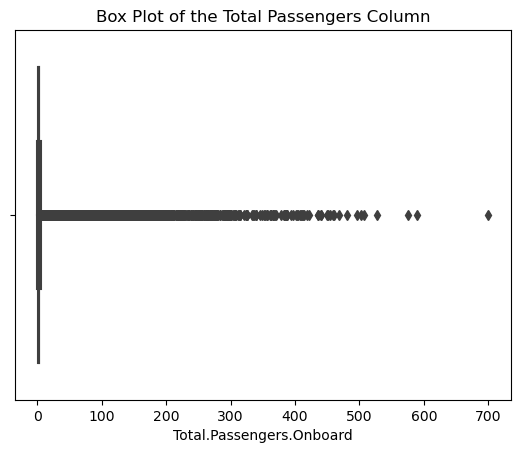

In [316]:
sns.boxplot(x=aviation_data_df['Total.Passengers.Onboard'])
plt.title("Box Plot of the Total Passengers Column");

### Aircraft Make per Total Passengers

In [349]:
pop_aircraft = aviation_data_df.groupby("Make")['Total.Passengers.Onboard'].sum().sort_values(ascending=False)[:10]
pop_aircraft

Make
Boeing               120808.802769
Cessna                53194.212675
Mcdonnell Douglas     32398.719949
Piper                 30779.936267
Airbus                25681.884125
Beech                 13961.184143
Douglas                7645.328907
Lockheed               6601.833106
Bell                   5466.343040
Embraer                4552.553344
Name: Total.Passengers.Onboard, dtype: float64

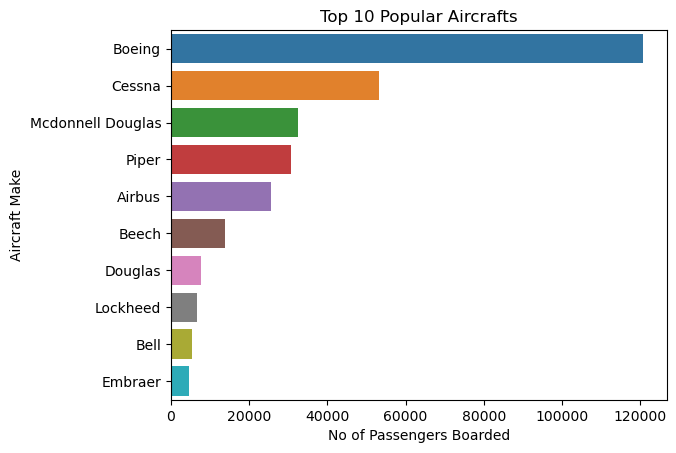

In [350]:
plot_barplot(data=pop_aircraft, 
            title="Top 10 Popular Aircrafts",
            xlabel="No of Passengers Boarded",
            ylabel="Aircraft Make")

### Incidences per Aircraft Make

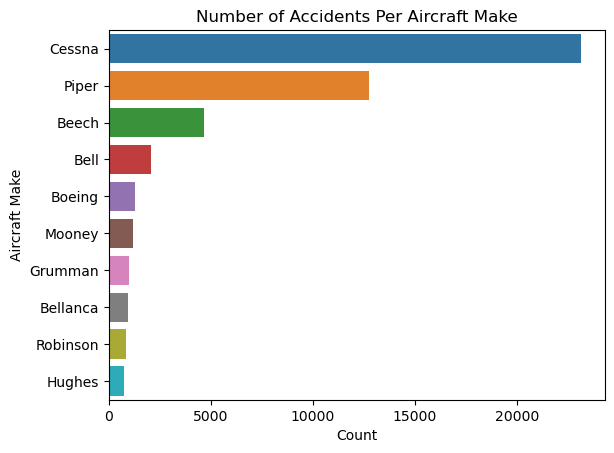

In [319]:
plot_barplot(data=aviation_data_df['Make'].value_counts(), 
            title="Number of Accidents Per Aircraft Make",
            xlabel="Count",
            ylabel="Aircraft Make")

##### Observation
> Cessna and Piper aircrafts have, unfortunately, been in the most accidents according to the dataset.

### Aircraft's Purpose of Flight - Makes and Models

In [320]:
# Value counts of the Purpose of the Flights in the dataset
aviation_data_df['Purpose.of.flight'].value_counts()[:10]

Personal              41981
Instructional          8811
Unknown                7555
Aerial Application     3681
Business               3509
Positioning            1366
Other Work Use          947
Ferry                   707
Aerial Observation      609
Public Aircraft         608
Name: Purpose.of.flight, dtype: int64

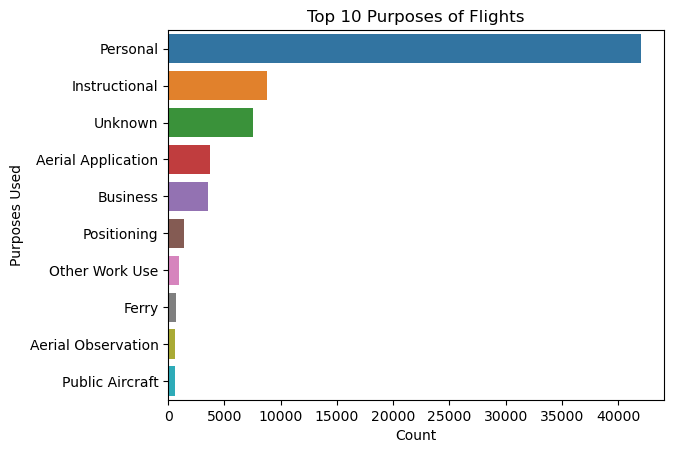

In [321]:
plot_barplot(data=aviation_data_df['Purpose.of.flight'].value_counts(), 
            title="Top 10 Purposes of Flights",
            xlabel="Count",
            ylabel="Purposes Used")

In [322]:
aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts()[:10]

Cessna          1219
Piper            728
Beech            451
Bell             145
Mooney            95
Hughes            72
Bellanca          53
Robinson          51
De Havilland      32
Enstrom           26
Name: Make, dtype: int64

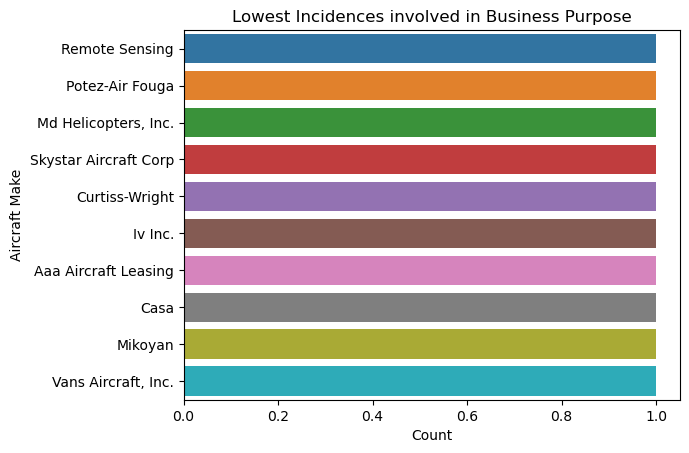

In [323]:
plot_barplot(data=aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts(ascending=True), 
            title="Lowest Incidences involved in Business Purpose",
            xlabel="Count",
            ylabel="Aircraft Make")

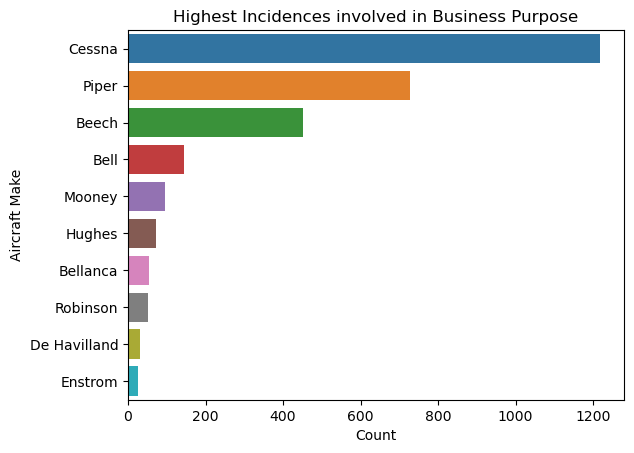

In [324]:
plot_barplot(data=aviation_data_df[aviation_data_df['Purpose.of.flight'] == "Business"]["Make"].value_counts(), 
            title="Highest Incidences involved in Business Purpose",
            xlabel="Count",
            ylabel="Aircraft Make")

In [325]:
airplanes_purposes = aviation_data_df[["Purpose.of.flight", "Make", "Model"]].sort_values(by="Purpose.of.flight")
airplanes_purposes[airplanes_purposes['Purpose.of.flight'] == "Air Drop"]

,Purpose.of.flight,Make,Model
80810,Air Drop,Airbus Helicopters,EC 130
67245,Air Drop,Schweizer,269C
51051,Air Drop,Piper,PA-30
82158,Air Drop,Cessna,A185
72621,Air Drop,Fairchild,PT-19A
77691,Air Drop,Aeronca,7BCM
73439,Air Drop,Bell,206B
53437,Air Drop,Cessna,A185F


In [326]:
aviation_data_df.groupby("Purpose.of.flight").count()["Make"]

Purpose.of.flight
ASHO                             2
Aerial Application            3681
Aerial Observation             609
Air Drop                         8
Air Race show                   53
Air Race/show                   38
Banner Tow                      70
Business                      3509
Executive/corporate            480
External Load                   75
Ferry                          707
Firefighting                    22
Flight Test                    315
Glider Tow                      29
Instructional                 8811
Other Work Use                 947
PUBS                             1
Personal                     41981
Positioning                   1366
Public Aircraft                608
Public Aircraft - Federal       75
Public Aircraft - Local         62
Public Aircraft - State         48
Skydiving                      151
Unknown                       7555
Name: Make, dtype: int64

In [327]:
aviation_data_df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO'], dtype=object)

### Analysis of data for the US only

<ipython-input-328-e3b8f67f66c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Total.Injuries'] = us_data['Total.Fatal.Injuries'] + us_data['Total.Serious.Injuries'] +\


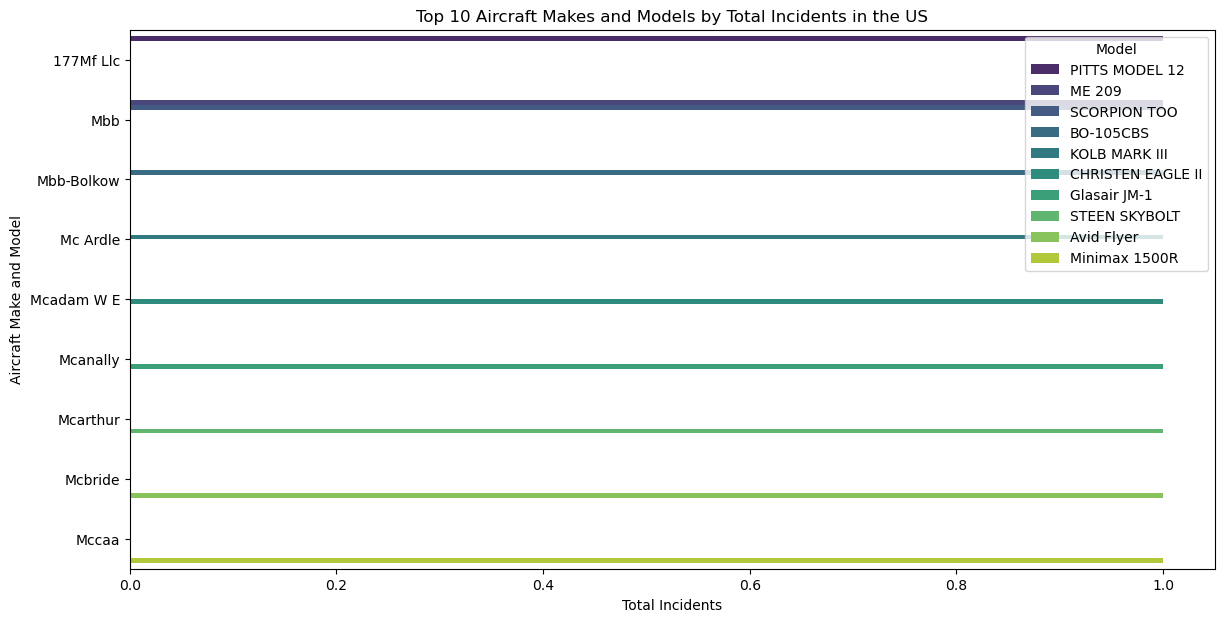

In [328]:
# Filter data for the United States
us_data = aviation_data_df[aviation_data_df['Country'] == 'United States']

# Calculate total injuries and incidents
us_data['Total.Injuries'] = us_data['Total.Fatal.Injuries'] + us_data['Total.Serious.Injuries'] +\
                            + us_data['Total.Minor.Injuries']

# Aggregate data by Make and Model
aircraft_safety_metrics_us = us_data.groupby(['Make', 'Model']).agg({
    'Total.Injuries': 'sum',
    'Event.Id': 'count'
}).rename(columns={'Event.Id': 'Total.Incidents'}).reset_index()

# Calculate average injuries per incident
aircraft_safety_metrics_us['Avg.Injuries.Per.Incident'] = aircraft_safety_metrics_us['Total.Injuries'] / aircraft_safety_metrics_us['Total.Incidents']

aircraft_safety_metrics_us.sort_values(by="Total.Incidents", ascending=False)[:10]

# Plot Total Incidents
plt.figure(figsize=(14, 7))

top_aircrafts = aircraft_safety_metrics_us.sort_values('Total.Incidents', ascending=True)[:10]
sns.barplot(data=top_aircrafts, x='Total.Incidents', y='Make', hue='Model', palette='viridis')

plt.title('Top 10 Aircraft Makes and Models by Total Incidents in the US')
plt.xlabel('Total Incidents')
plt.ylabel('Aircraft Make and Model')
plt.legend(title='Model')
plt.show()

## Filter Dataframe by Total Passengers Onboard to estimate size of Aircraft


### large_sized_aircrafts_df aggregated by Total Passenger Injuries

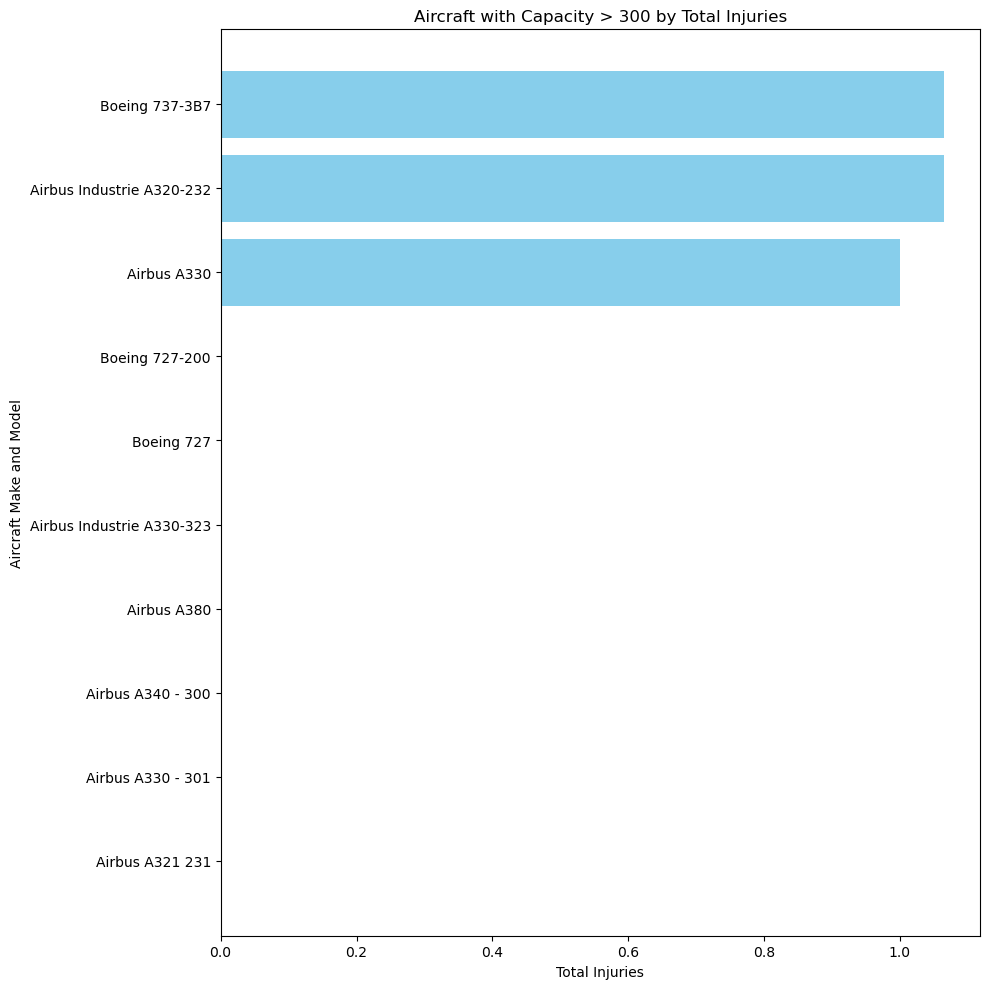

In [329]:
# Filter the DataFrame to include only planes with a capacity greater than 300
large_capacity_aircrafts_df = aviation_data_df[aviation_data_df['Total.Passengers.Onboard'] >= 300]

# Group by Make and Model to calculate the sum of Fatal, Serious, and Minor Injuries
large_aircrafts_safety_analysis = large_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum')
).reset_index()[:10]

# Calculate the total injuries by summing Fatal, Serious, and Minor Injuries
large_aircrafts_safety_analysis['Total_Injuries'] = large_aircrafts_safety_analysis['Total_Fatal_Injuries'] + large_aircrafts_safety_analysis['Total_Serious_Injuries'] + large_aircrafts_safety_analysis['Total_Minor_Injuries']

# Sort by Total_Injuries (ascending) to get the safest aircraft with fewer total injuries
safety_metrics_sorted = large_aircrafts_safety_analysis.sort_values(by='Total_Injuries', ascending=True)

# Plot the results: Bar plot for Total Injuries by Make and Model
plt.figure(figsize=(10, 10))

plt.barh(safety_metrics_sorted['Make'] + ' ' + safety_metrics_sorted['Model'], 
         safety_metrics_sorted['Total_Injuries'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Injuries')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity > 300 by Total Injuries')

# Display the plot
plt.tight_layout()
plt.show()

## large_sized_aircrafts_df aggregated by Number of Accidents

In [1]:
# Filter the DataFrame to include only planes with a capacity greater than 300
large_capacity_aircrafts_df = aviation_data_df[aviation_data_df['Total.Passengers.Onboard'] >= 300]
# Step 2: Group by Make and Model to calculate total accidents
large_aircrafts_safety_analysis_2 = large_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(Total_Accidents=('Event.Id', 'count')).reset_index()[:10]

#ort by Total_Accidents (ascending) to get the safest aircraft with fewer accidents
safety_metrics_sorted = large_aircrafts_safety_analysis_2 .sort_values(by='Total_Accidents', ascending=True)

# Step 4: Plot the results
plt.figure(figsize=(10, 10))

# Bar plot for Total Accidents by Make and Model
plt.barh(safety_metrics_sorted['Make'] + ' ' + safety_metrics_sorted['Model'], 
         safety_metrics_sorted['Total_Accidents'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Accidents')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity > 300 and Fewer Accidents Over Time')

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'aviation_data_df' is not defined

## Medium Sized Aicrafts Dataframe

### medium_capacity_aircrafts_df aggregated by Total Passenger Injuries

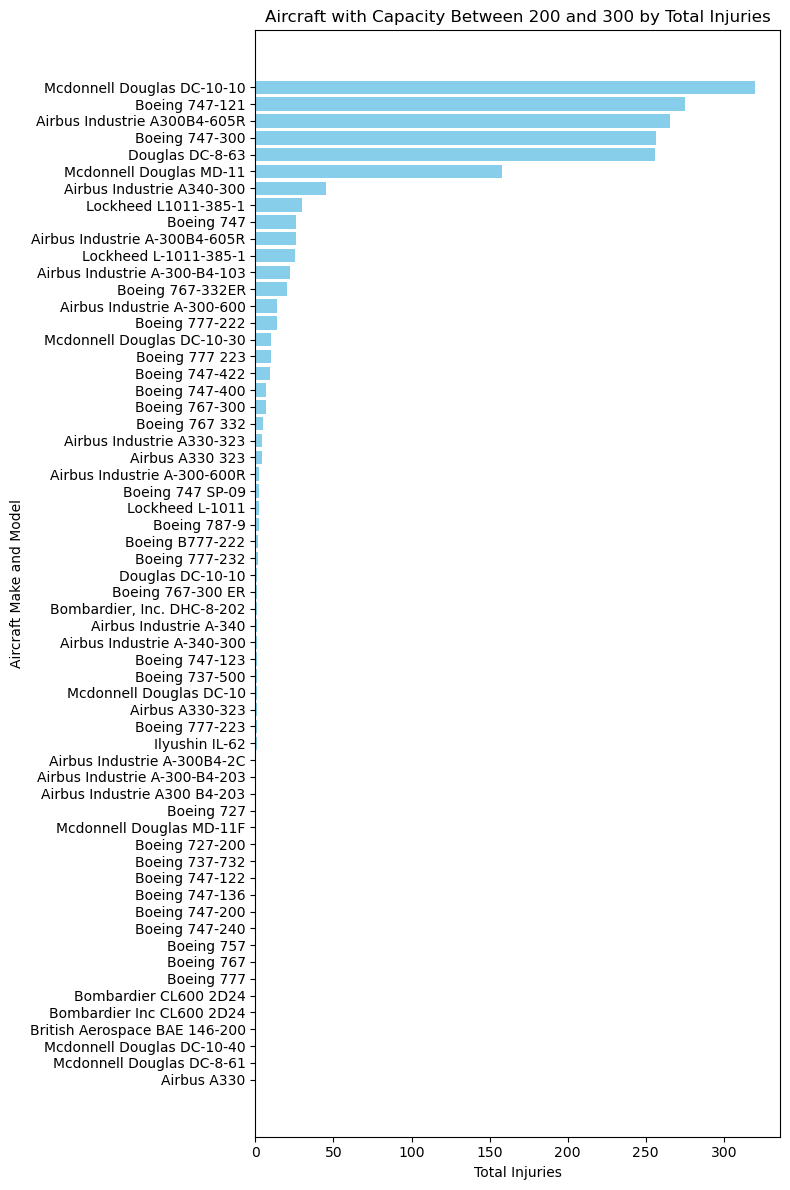

In [331]:
# Step 1: Filter the DataFrame to include only planes with a capacity between 250 and 300
medium_capacity_aircrafts_df = aviation_data_df[(aviation_data_df['Total.Passengers.Onboard'] >= 250) & (aviation_data_df['Total.Passengers.Onboard'] < 300)]

# Step 2: Group by Make and Model to calculate the sum of Fatal, Serious, and Minor Injuries
medium_aircrafts_safety_analysis = medium_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum')
).reset_index()[:10]

# Calculate the total injuries by summing Fatal, Serious, and Minor Injuries
medium_aircrafts_safety_analysis['Total_Injuries'] = (
    medium_aircrafts_safety_analysis['Total_Fatal_Injuries'] +
    medium_aircrafts_safety_analysis['Total_Serious_Injuries'] +
    medium_aircrafts_safety_analysis['Total_Minor_Injuries']
)

# Step 3: Sort by Total_Injuries (ascending) to get the safest aircraft with fewer total injuries
safety_metrics_sorted = medium_aircrafts_safety_analysis.sort_values(by='Total_Injuries', ascending=True)

# Step 4: Plot the results
plt.figure(figsize=(8, 12))

# Bar plot for Total Injuries by Make and Model
plt.barh(safety_metrics_sorted['Make'] + ' ' + safety_metrics_sorted['Model'], 
         safety_metrics_sorted['Total_Injuries'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Injuries')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity Between 200 and 300 by Total Injuries')

# Display the plot
plt.tight_layout()
plt.show()


### medium_capacity_aircrafts_df aggregated by Total Accidents 

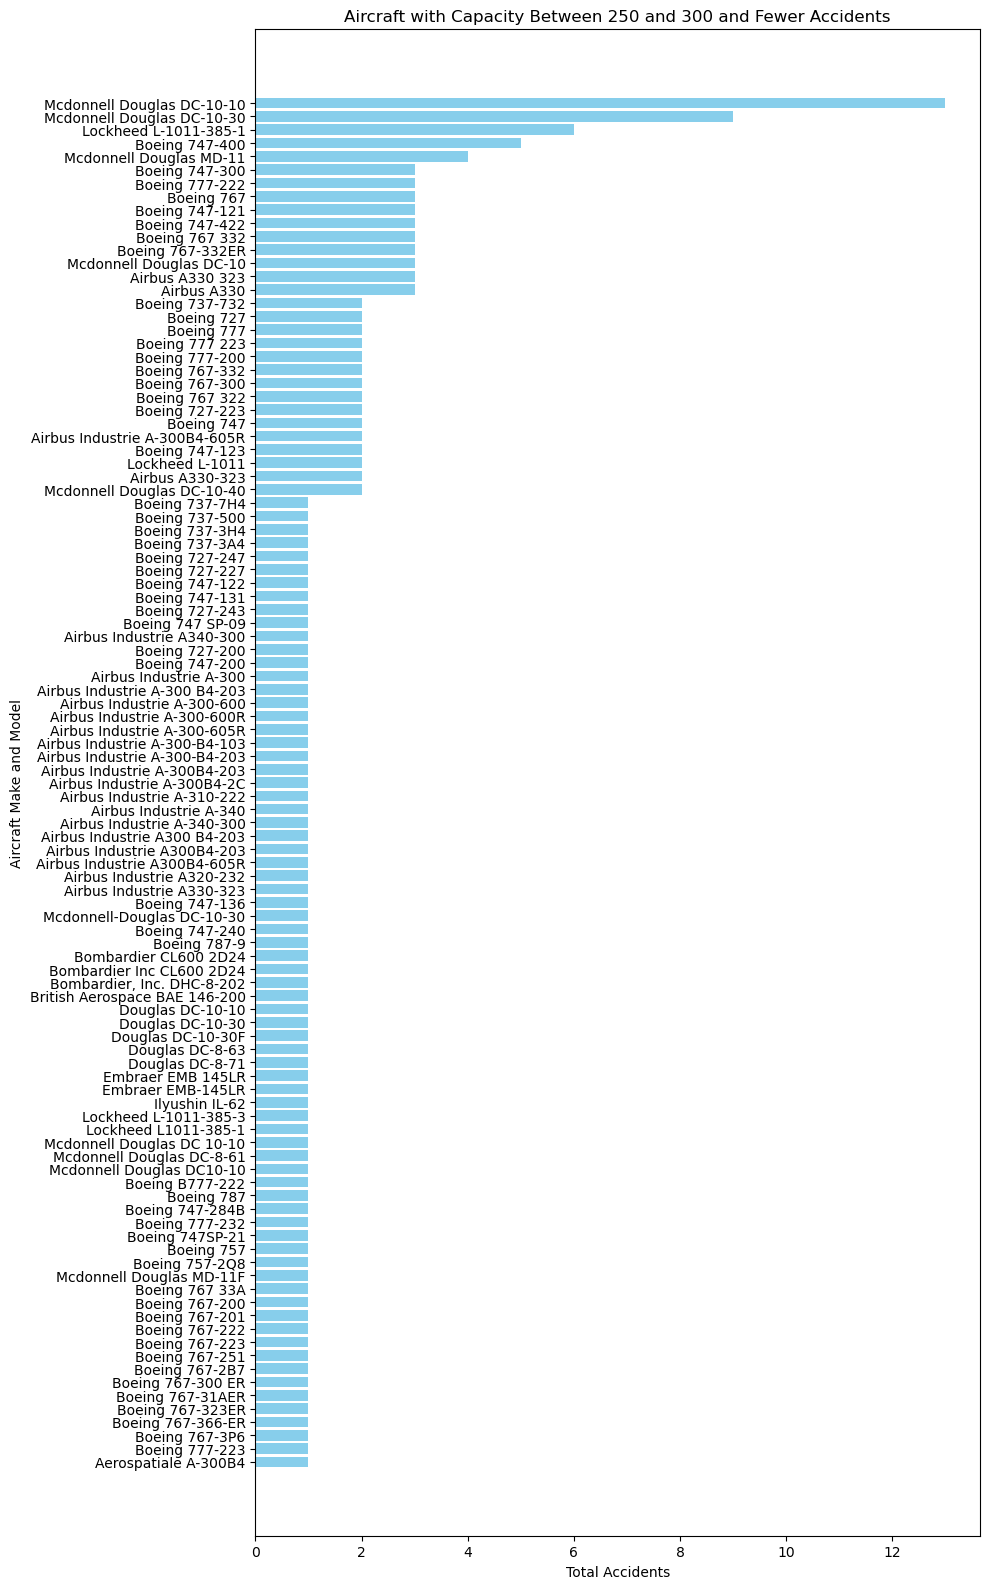

In [332]:
# Filter the DataFrame to include only planes with a capacity between 200 and 300
medium_capacity_aircrafts_df = aviation_data_df[
    (aviation_data_df['Total.Passengers.Onboard'] >= 200) & 
    (aviation_data_df['Total.Passengers.Onboard'] <= 300)
]

# Group by Make and Model to calculate total accidents
medium_aircrafts_safety_analysis = medium_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(Total_Accidents=('Event.Id', 'count')).reset_index()[:10]

# Sort by Total_Accidents (ascending) to get the safest aircraft with fewer accidents
safety_metrics_sorted = medium_aircrafts_safety_analysis.sort_values(by='Total_Accidents', ascending=True)


# Bar plot for Total Accidents by Make and Model
plt.figure(figsize=(10, 16))

plt.barh(safety_metrics_sorted['Make'] + ' ' + safety_metrics_sorted['Model'], safety_metrics_sorted['Total_Accidents'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Accidents')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity Between 250 and 300 and Fewer Accidents')

# Display the plot
plt.tight_layout()
plt.show()

## small capacity aicrafts

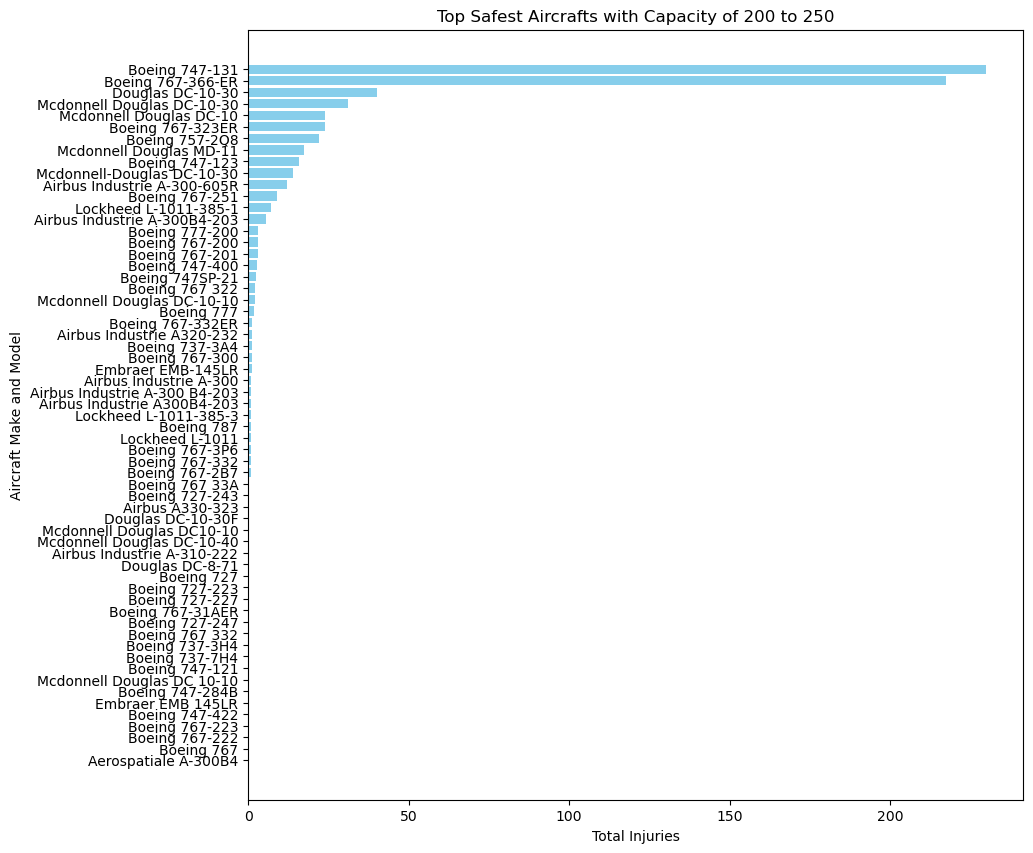

In [333]:

# Filter the DataFrame to include only planes with a capacity between 150 and 250
small_capacity_aircrafts_df = aviation_data_df[
    (aviation_data_df['Total.Passengers.Onboard'] >= 200) & 
    (aviation_data_df['Total.Passengers.Onboard'] < 250)
]

# Group by Make and Model to calculate the sum of Fatal, Serious, and Minor Injuries
small_aircrafts_safety_analysis = small_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum')
).reset_index()[:10]
# Calculate the total injuries by summing Fatal, Serious, and Minor Injuries
small_aircrafts_safety_analysis['Total_Injuries'] = (
    small_aircrafts_safety_analysis['Total_Fatal_Injuries'] +
    small_aircrafts_safety_analysis['Total_Serious_Injuries'] +
    small_aircrafts_safety_analysis['Total_Minor_Injuries']
)

# Sort by Total_Injuries (ascending) to get the safest aircraft with fewer total injuries
small_aircrafts_safety_metrics_sorted = small_aircrafts_safety_analysis.sort_values(by='Total_Injuries', ascending=True)

# Select the top 100 safest planes
top_20_safest_planes = small_aircrafts_safety_metrics_sorted.head(20)

plt.figure(figsize=(10, 10))
plt.barh(small_aircrafts_safety_metrics_sorted['Make'] + ' ' + small_aircrafts_safety_metrics_sorted['Model'], 
         small_aircrafts_safety_metrics_sorted['Total_Injuries'], color='skyblue')
plt.xlabel('Total Injuries')
plt.ylabel('Aircraft Make and Model')
plt.title('Top Safest Aircrafts with Capacity of 200 to 250')

plt.show()

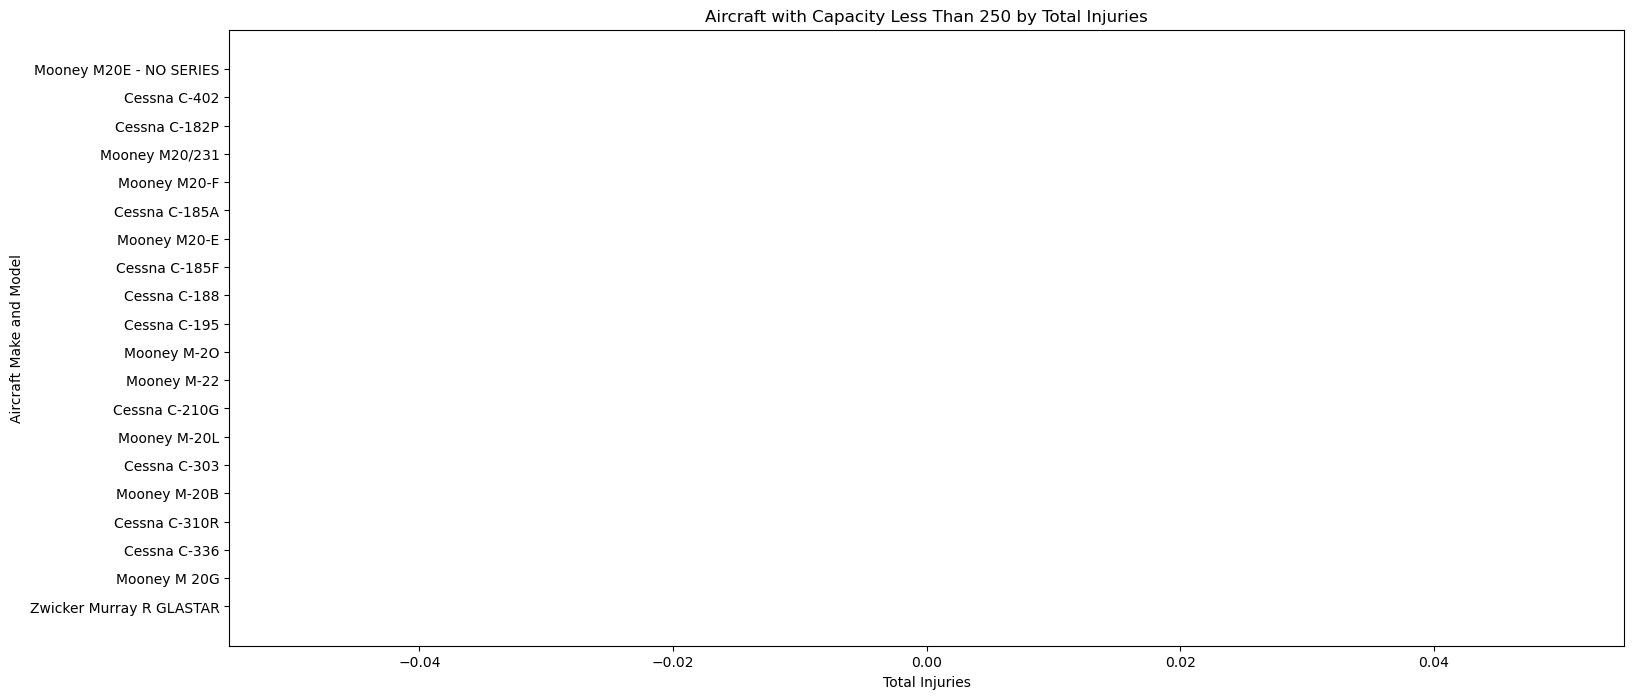

In [334]:
# Filter the DataFrame to include only planes with a capacity less than 200
small_capacity_aircrafts_df = aviation_data_df[aviation_data_df['Total.Passengers.Onboard'] >= 200 & (aviation_data_df['Total.Passengers.Onboard'] < 250)]

# Group by Make and Model to calculate the sum of Fatal, Serious, and Minor Injuries
small_aircrafts_safety_analysis = small_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(
    Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),
    Total_Serious_Injuries=('Total.Serious.Injuries', 'sum'),
    Total_Minor_Injuries=('Total.Minor.Injuries', 'sum')
).reset_index()

# Calculate the total injuries by summing Fatal, Serious, and Minor Injuries
small_aircrafts_safety_analysis['Total_Injuries'] = (
    small_aircrafts_safety_analysis['Total_Fatal_Injuries'] +
    small_aircrafts_safety_analysis['Total_Serious_Injuries'] +
    small_aircrafts_safety_analysis['Total_Minor_Injuries']
)

# Sort by Total_Injuries (ascending) to get the safest aircraft with fewer total injuries
small_aircrafts_safety_metrics_sorted = small_aircrafts_safety_analysis.sort_values(by='Total_Injuries', ascending=True)
# Select the top 100 safest planes
top_20_safest_planes = small_aircrafts_safety_metrics_sorted.head(20)

plt.figure(figsize=(18, 8))

plt.barh(top_20_safest_planes['Make'] + ' ' + top_20_safest_planes['Model'], 
        top_20_safest_planes['Total_Injuries'], color='skyblue')
plt.xlabel('Total Injuries')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity Less Than 250 by Total Injuries')

plt.show()


In [335]:
# Filter the DataFrame to include only planes with a capacity between 200 and 250
small_capacity_aircrafts_df = aviation_data_df[aviation_data_df['Total.Passengers.Onboard'] >= 200 & (aviation_data_df['Total.Passengers.Onboard'] < 250)]

# Group by Make and Model to calculate total accidents
small_aircrafts_safety_analysis = small_capacity_aircrafts_df.groupby(['Make', 'Model']).agg(Total_Accidents=('Event.Id', 'count')).reset_index()

# Sort by Total_Accidents (ascending) to get the safest aircraft with fewer accidents
safety_metrics_sorted = small_aircrafts_safety_analysis.sort_values(by='Total_Accidents', ascending=True)

# Step 4: Plot the results
plt.figure(figsize=(12, 10))

# Bar plot for Total Accidents by Make and Model
plt.barh(safety_metrics_sorted['Make'] + ' ' + safety_metrics_sorted['Model'], 
         safety_metrics_sorted['Total_Accidents'], color='skyblue')

# Adding labels and title
plt.xlabel('Total Accidents')
plt.ylabel('Aircraft Make and Model')
plt.title('Aircraft with Capacity Less Than 200 by Total Accidents')



Text(0.5, 1.0, 'Aircraft with Capacity Less Than 200 by Total Accidents')

C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025729196040> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000257291B43A0> (for post_execute):


KeyboardInterrupt: 